# Feature Effect Evaluation

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>

<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

In [1]:
config_file = "../../config_sim_simple_scenarios_20.ini"

# set up of example
sim_no = 1
n_train = 1000
snr = 10
groundtruth_effect = "empirical"

In [2]:
from configparser import ConfigParser
from joblib import load
import pandas as pd
from IPython.display import Markdown as md

from feature_effect_empirical_analysis.plotting.plots import boxplot_feature_effect_results, plot_effect_comparison
from feature_effect_empirical_analysis.data_generating.data_generation import generate_data

In [3]:
config = ConfigParser()
config.read(config_file)

['../../config_sim_simple_scenarios_20.ini']

## PDP

### Error of Model-PD compared to groundtruth-PD

In [4]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("pdp_results", f"sqlite:///..{effects_results_storage}")
df

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,mean_squared_error,0.095438,0.247000,2.502027e-02,2.319724e-03
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,0.118618,0.391003,7.255904e-03,6.453831e-03
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.000499,0.002117,4.758951e-04,3.697650e-05
3,0,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,mean_squared_error,0.001046,0.001039,1.053718e-08,1.053718e-08
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.000773,0.001792,8.376054e-04,2.043088e-03
...,...,...,...,...,...,...,...,...,...,...,...
195,0,XGBoost-2add-cor_20_1000_5,XGBoost-2add-cor,20,1000,5.0,mean_squared_error,0.014863,0.046687,4.900165e-03,4.097026e-03
196,0,XGBoost-full_20_1000_5,XGBoost-full,20,1000,5.0,mean_squared_error,0.039963,0.073055,1.881579e-03,7.548846e-04
197,0,SVM-RBF_20_1000_5,SVM-RBF,20,1000,5.0,mean_squared_error,0.001354,0.004856,2.050350e-03,1.644051e-04
198,0,GAM-2add-cor_20_1000_5,GAM-2add-cor,20,1000,5.0,mean_squared_error,0.001766,0.002351,1.332914e-04,1.332914e-04


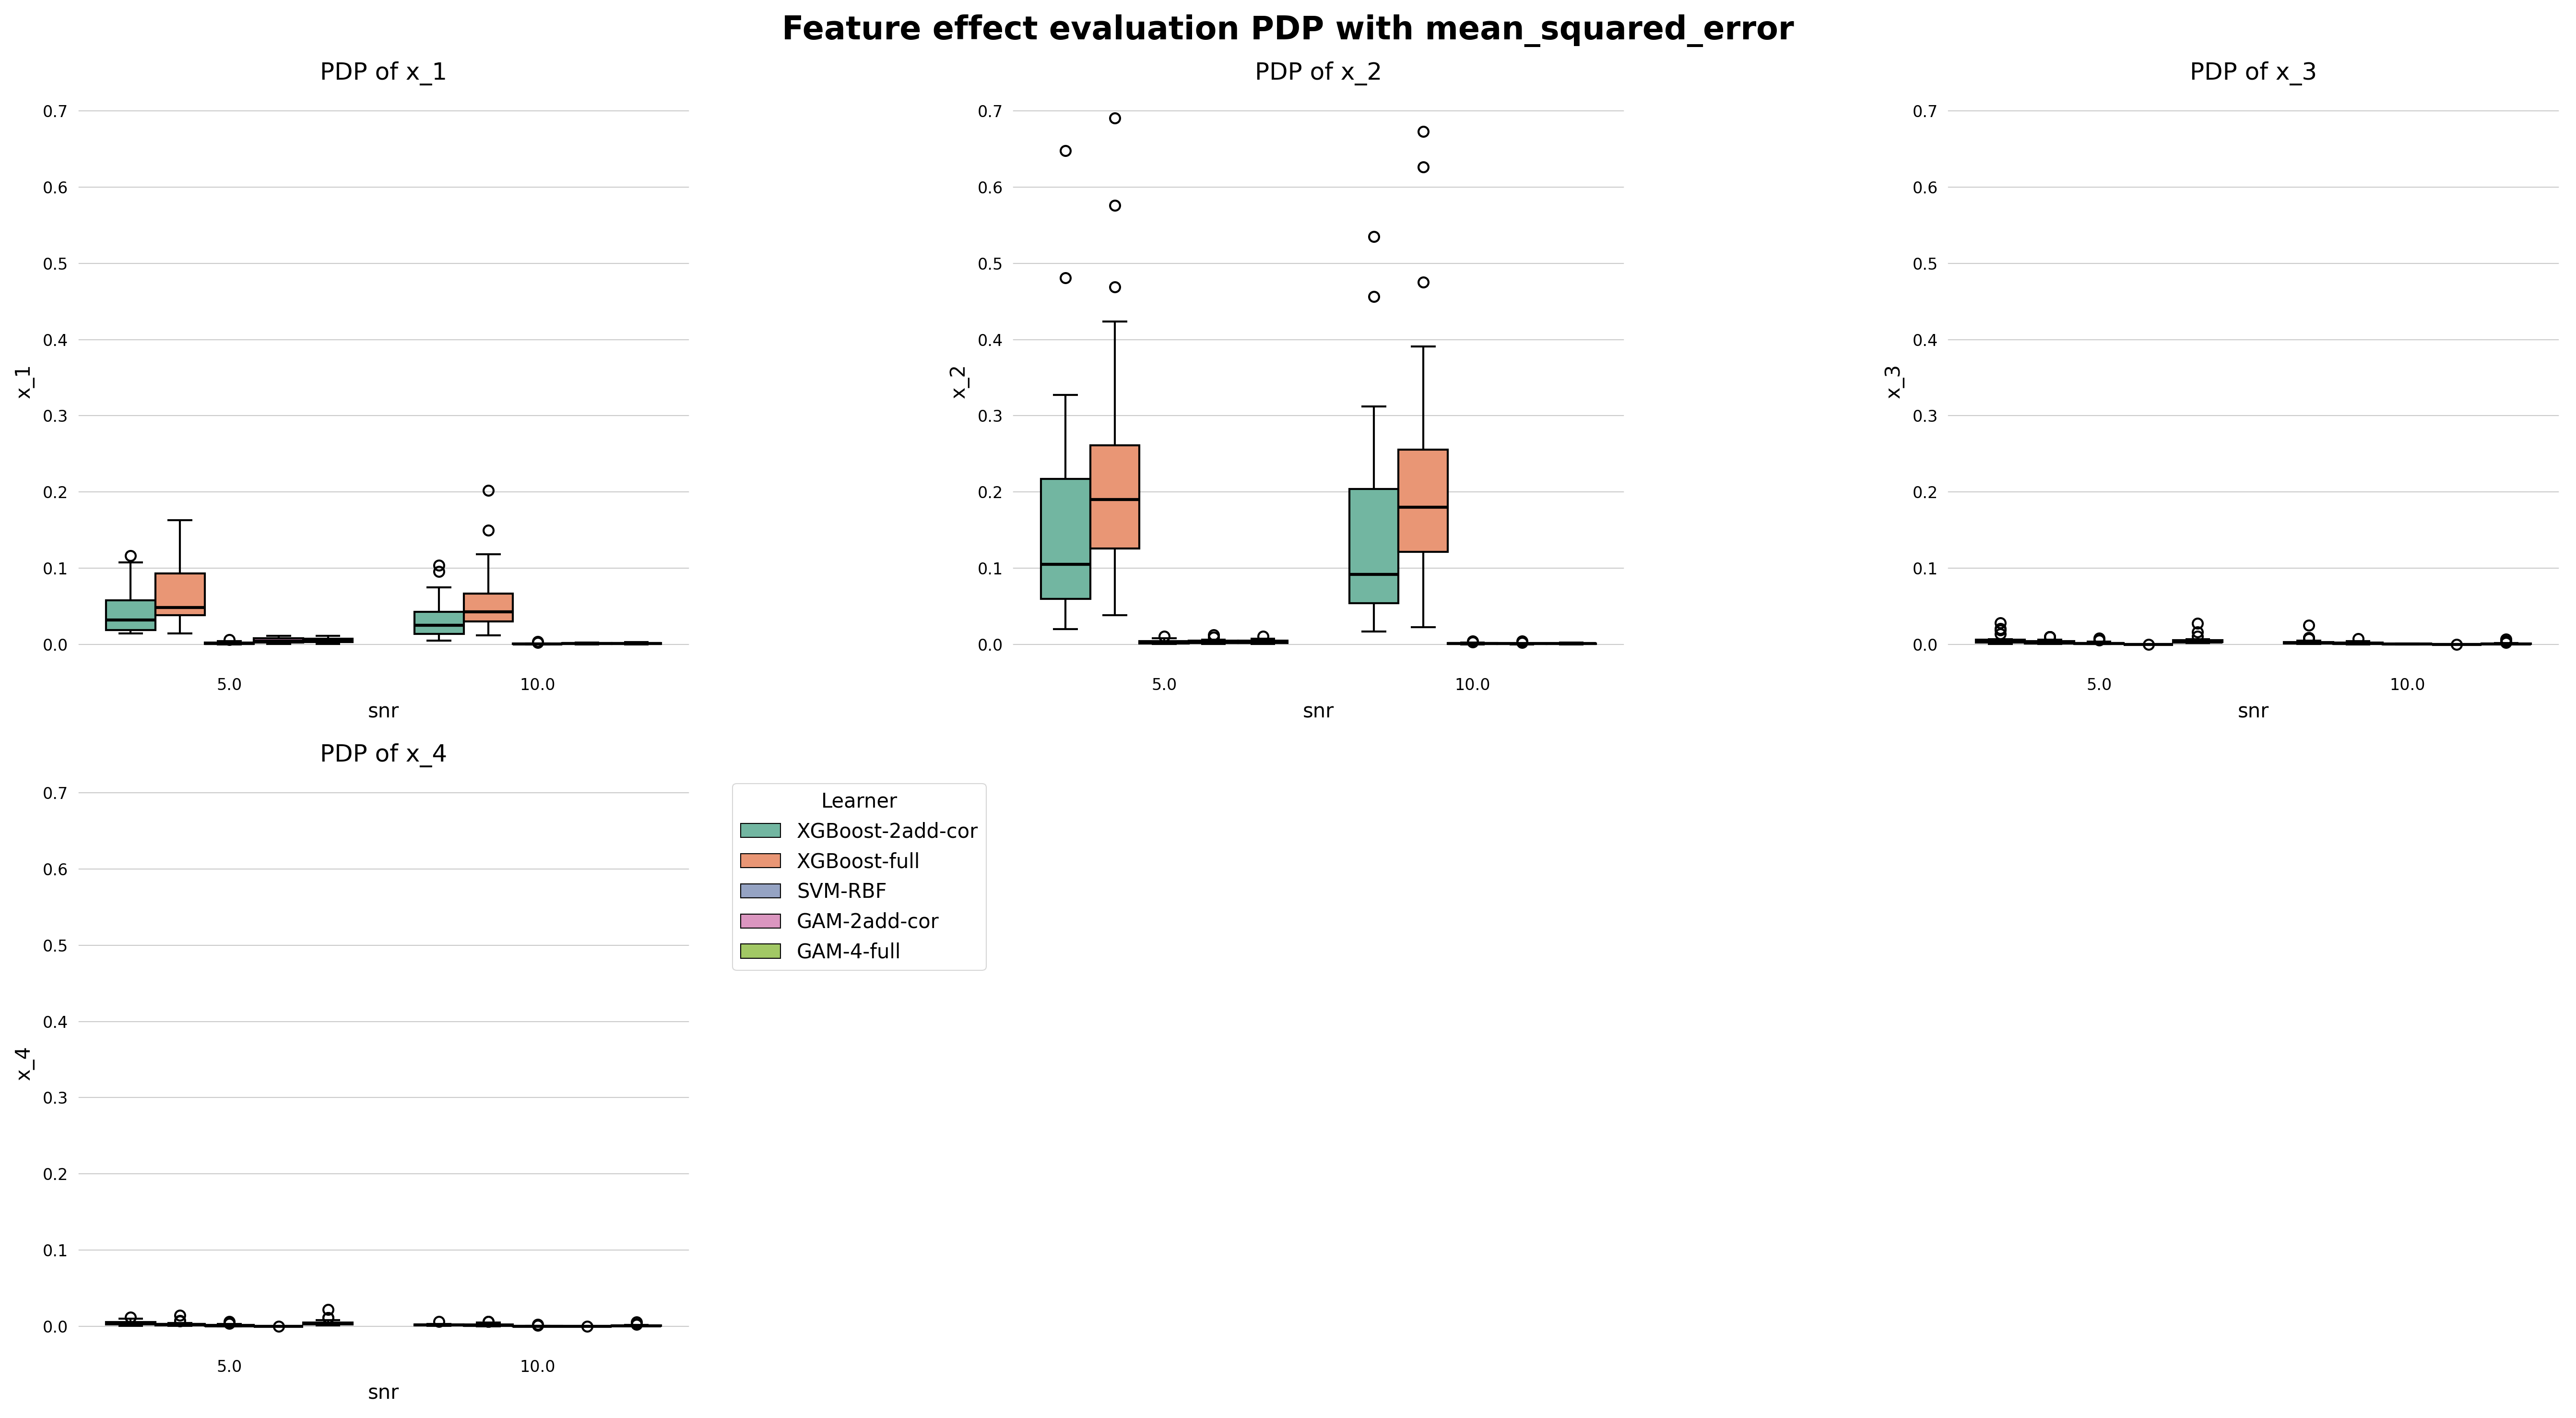

In [6]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4"], df=df, effect_type="PDP");

### PDP example visualizations

In [7]:
md(f"(simulation no. {sim_no} with n_train={n_train} and snr={snr})")

(simulation no. 1 with n_train=1000 and snr=10)

In [9]:
# init groundtruth
groundtruth = load("../groundtruth.joblib")
# recreate dataset
X_train, y_train, X_test, y_test = generate_data(groundtruth, n_train, 1000, snr, seed=1)
# load models
gam = load(f'../models/GAM-2add-cor_{sim_no}_{n_train}_{snr}.joblib')
xgb = load(f'../models/XGBoost-full_{sim_no}_{n_train}_{snr}.joblib')
svm = load(f'../models/SVM-RBF_{sim_no}_{n_train}_{snr}.joblib')

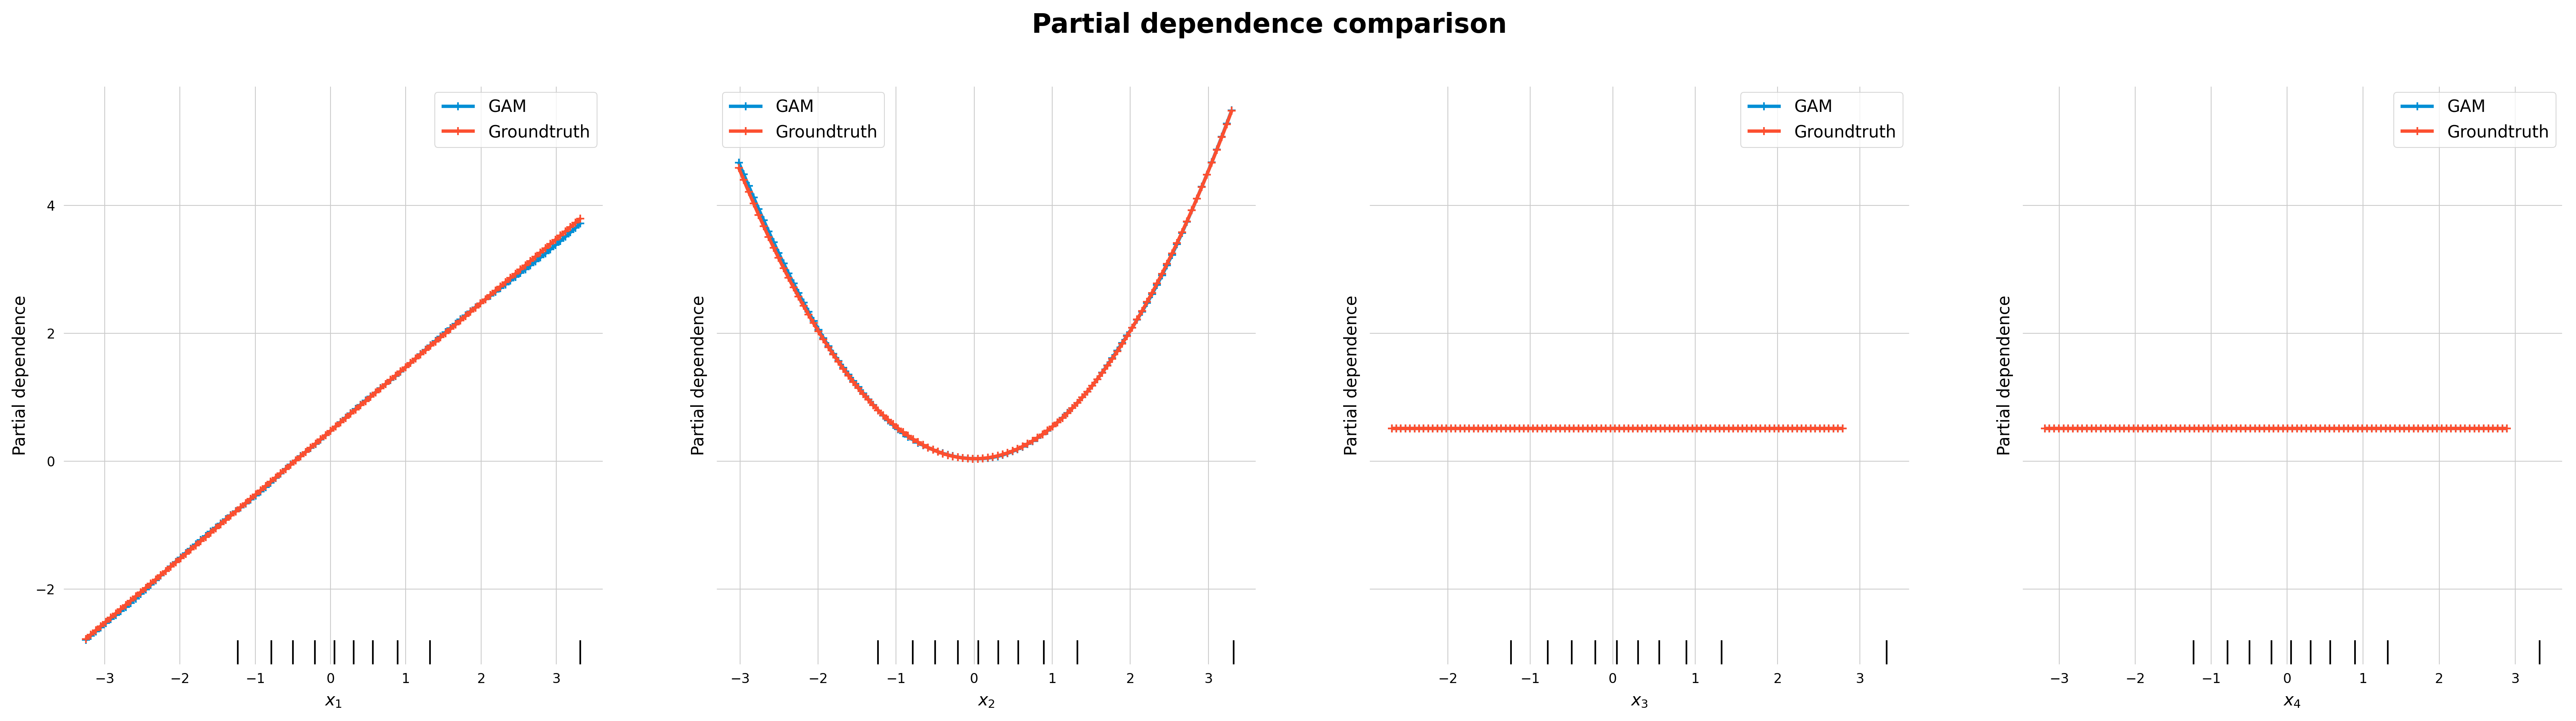

In [10]:
%matplotlib inline
plot_effect_comparison(gam, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

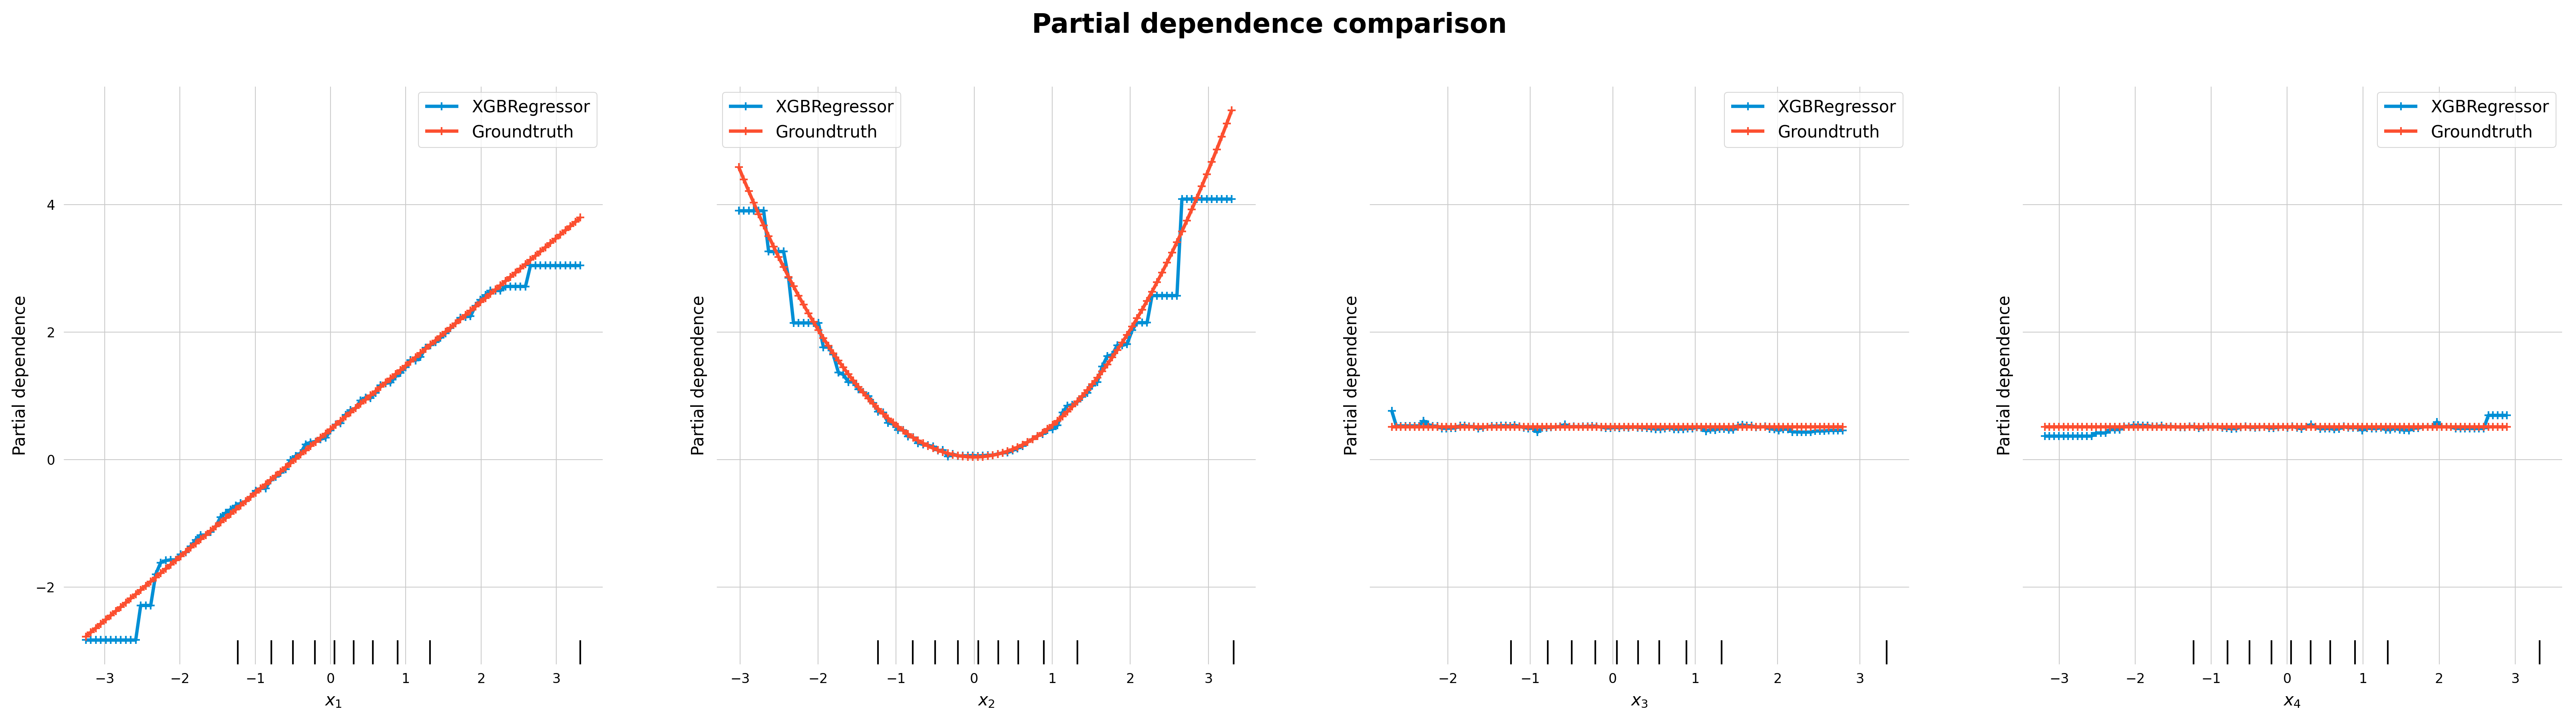

In [11]:
%matplotlib inline
plot_effect_comparison(xgb, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

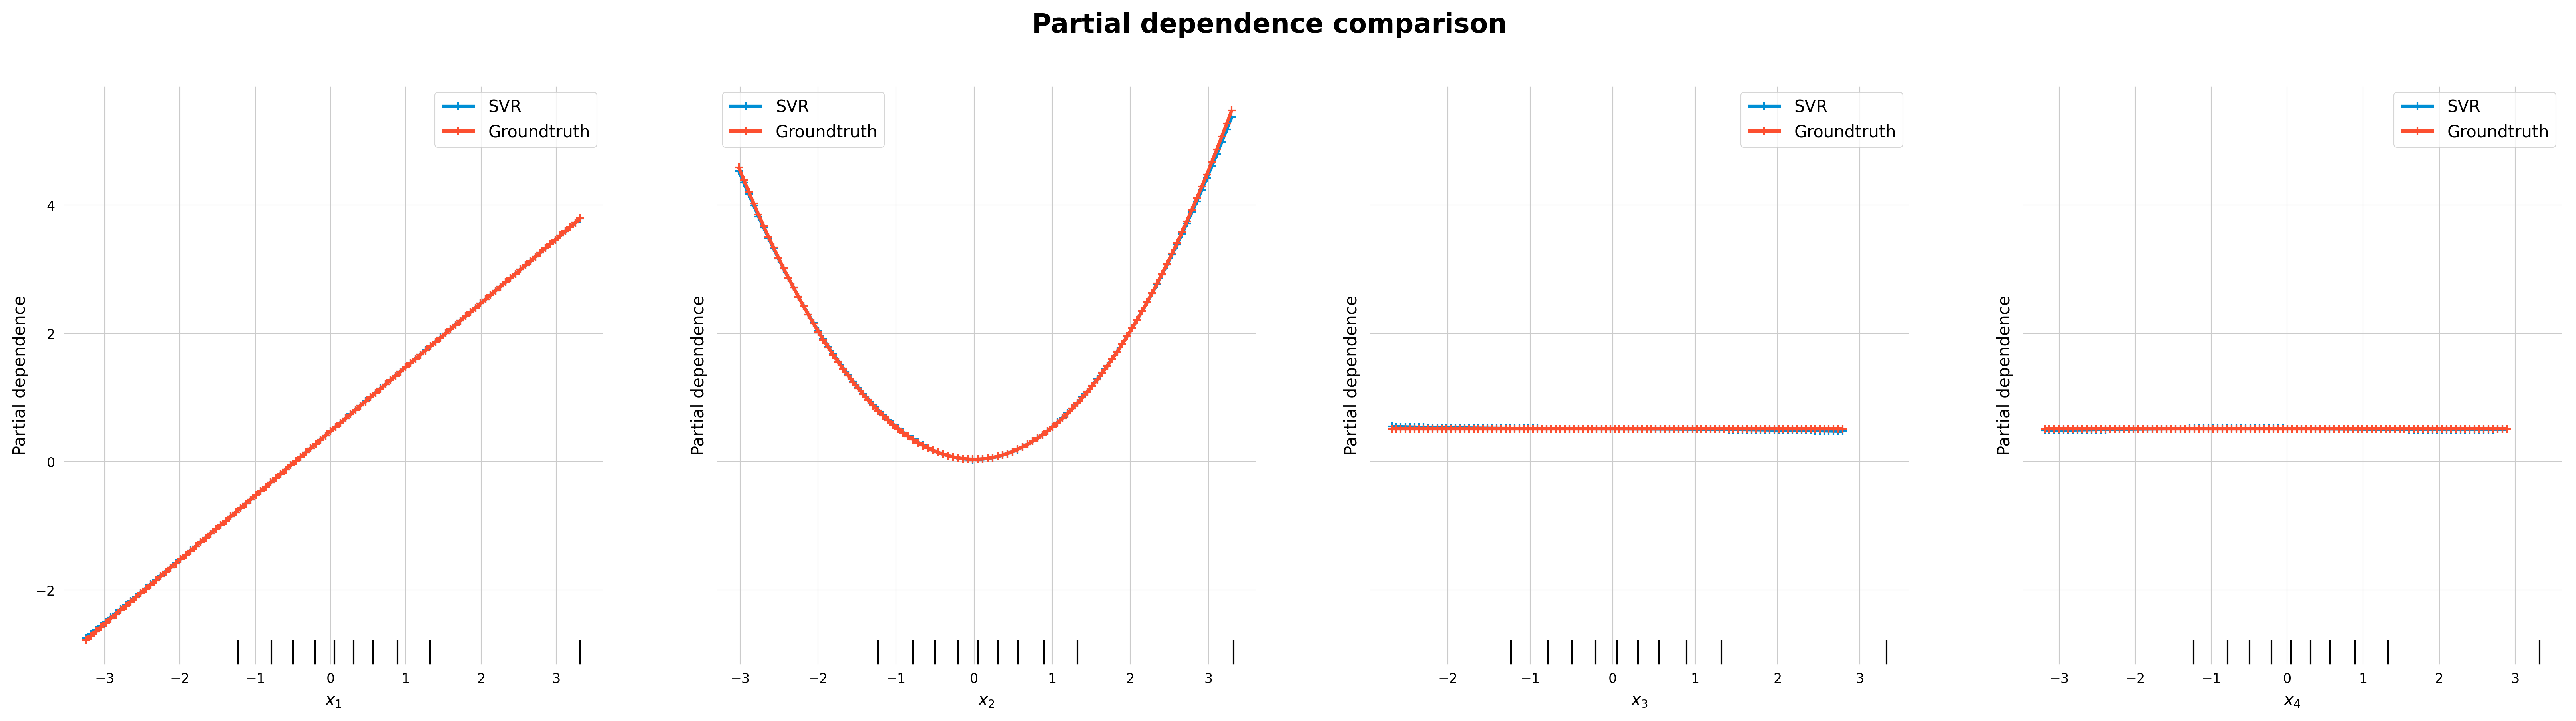

In [12]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="PDP", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

## ALE

### Error of Model-ALE compared to groundtruth-ALE

In [13]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("ale_results", f"sqlite:///..{effects_results_storage}")
df

,index,model_id,model,simulation,n_train,snr,metric,x_1,x_2,x_3,x_4
0,0,XGBoost-2add-cor_1_1000_10,XGBoost-2add-cor,1,1000,10.0,mean_squared_error,0.017291,0.055682,0.004393,0.001709
1,0,XGBoost-full_1_1000_10,XGBoost-full,1,1000,10.0,mean_squared_error,0.020082,0.071291,0.002280,0.001288
2,0,SVM-RBF_1_1000_10,SVM-RBF,1,1000,10.0,mean_squared_error,0.000127,0.000411,0.000102,0.000033
3,0,GAM-2add-cor_1_1000_10,GAM-2add-cor,1,1000,10.0,mean_squared_error,0.000131,0.000167,0.000000,0.000000
4,0,GAM-4-full_1_1000_10,GAM-4-full,1,1000,10.0,mean_squared_error,0.000095,0.000344,0.000250,0.000481
...,...,...,...,...,...,...,...,...,...,...,...
195,0,XGBoost-2add-cor_20_1000_5,XGBoost-2add-cor,20,1000,5.0,mean_squared_error,0.006097,0.018095,0.002355,0.002388
196,0,XGBoost-full_20_1000_5,XGBoost-full,20,1000,5.0,mean_squared_error,0.009303,0.020996,0.001011,0.000663
197,0,SVM-RBF_20_1000_5,SVM-RBF,20,1000,5.0,mean_squared_error,0.000318,0.000970,0.000602,0.000011
198,0,GAM-2add-cor_20_1000_5,GAM-2add-cor,20,1000,5.0,mean_squared_error,0.000308,0.001160,0.000000,0.000000


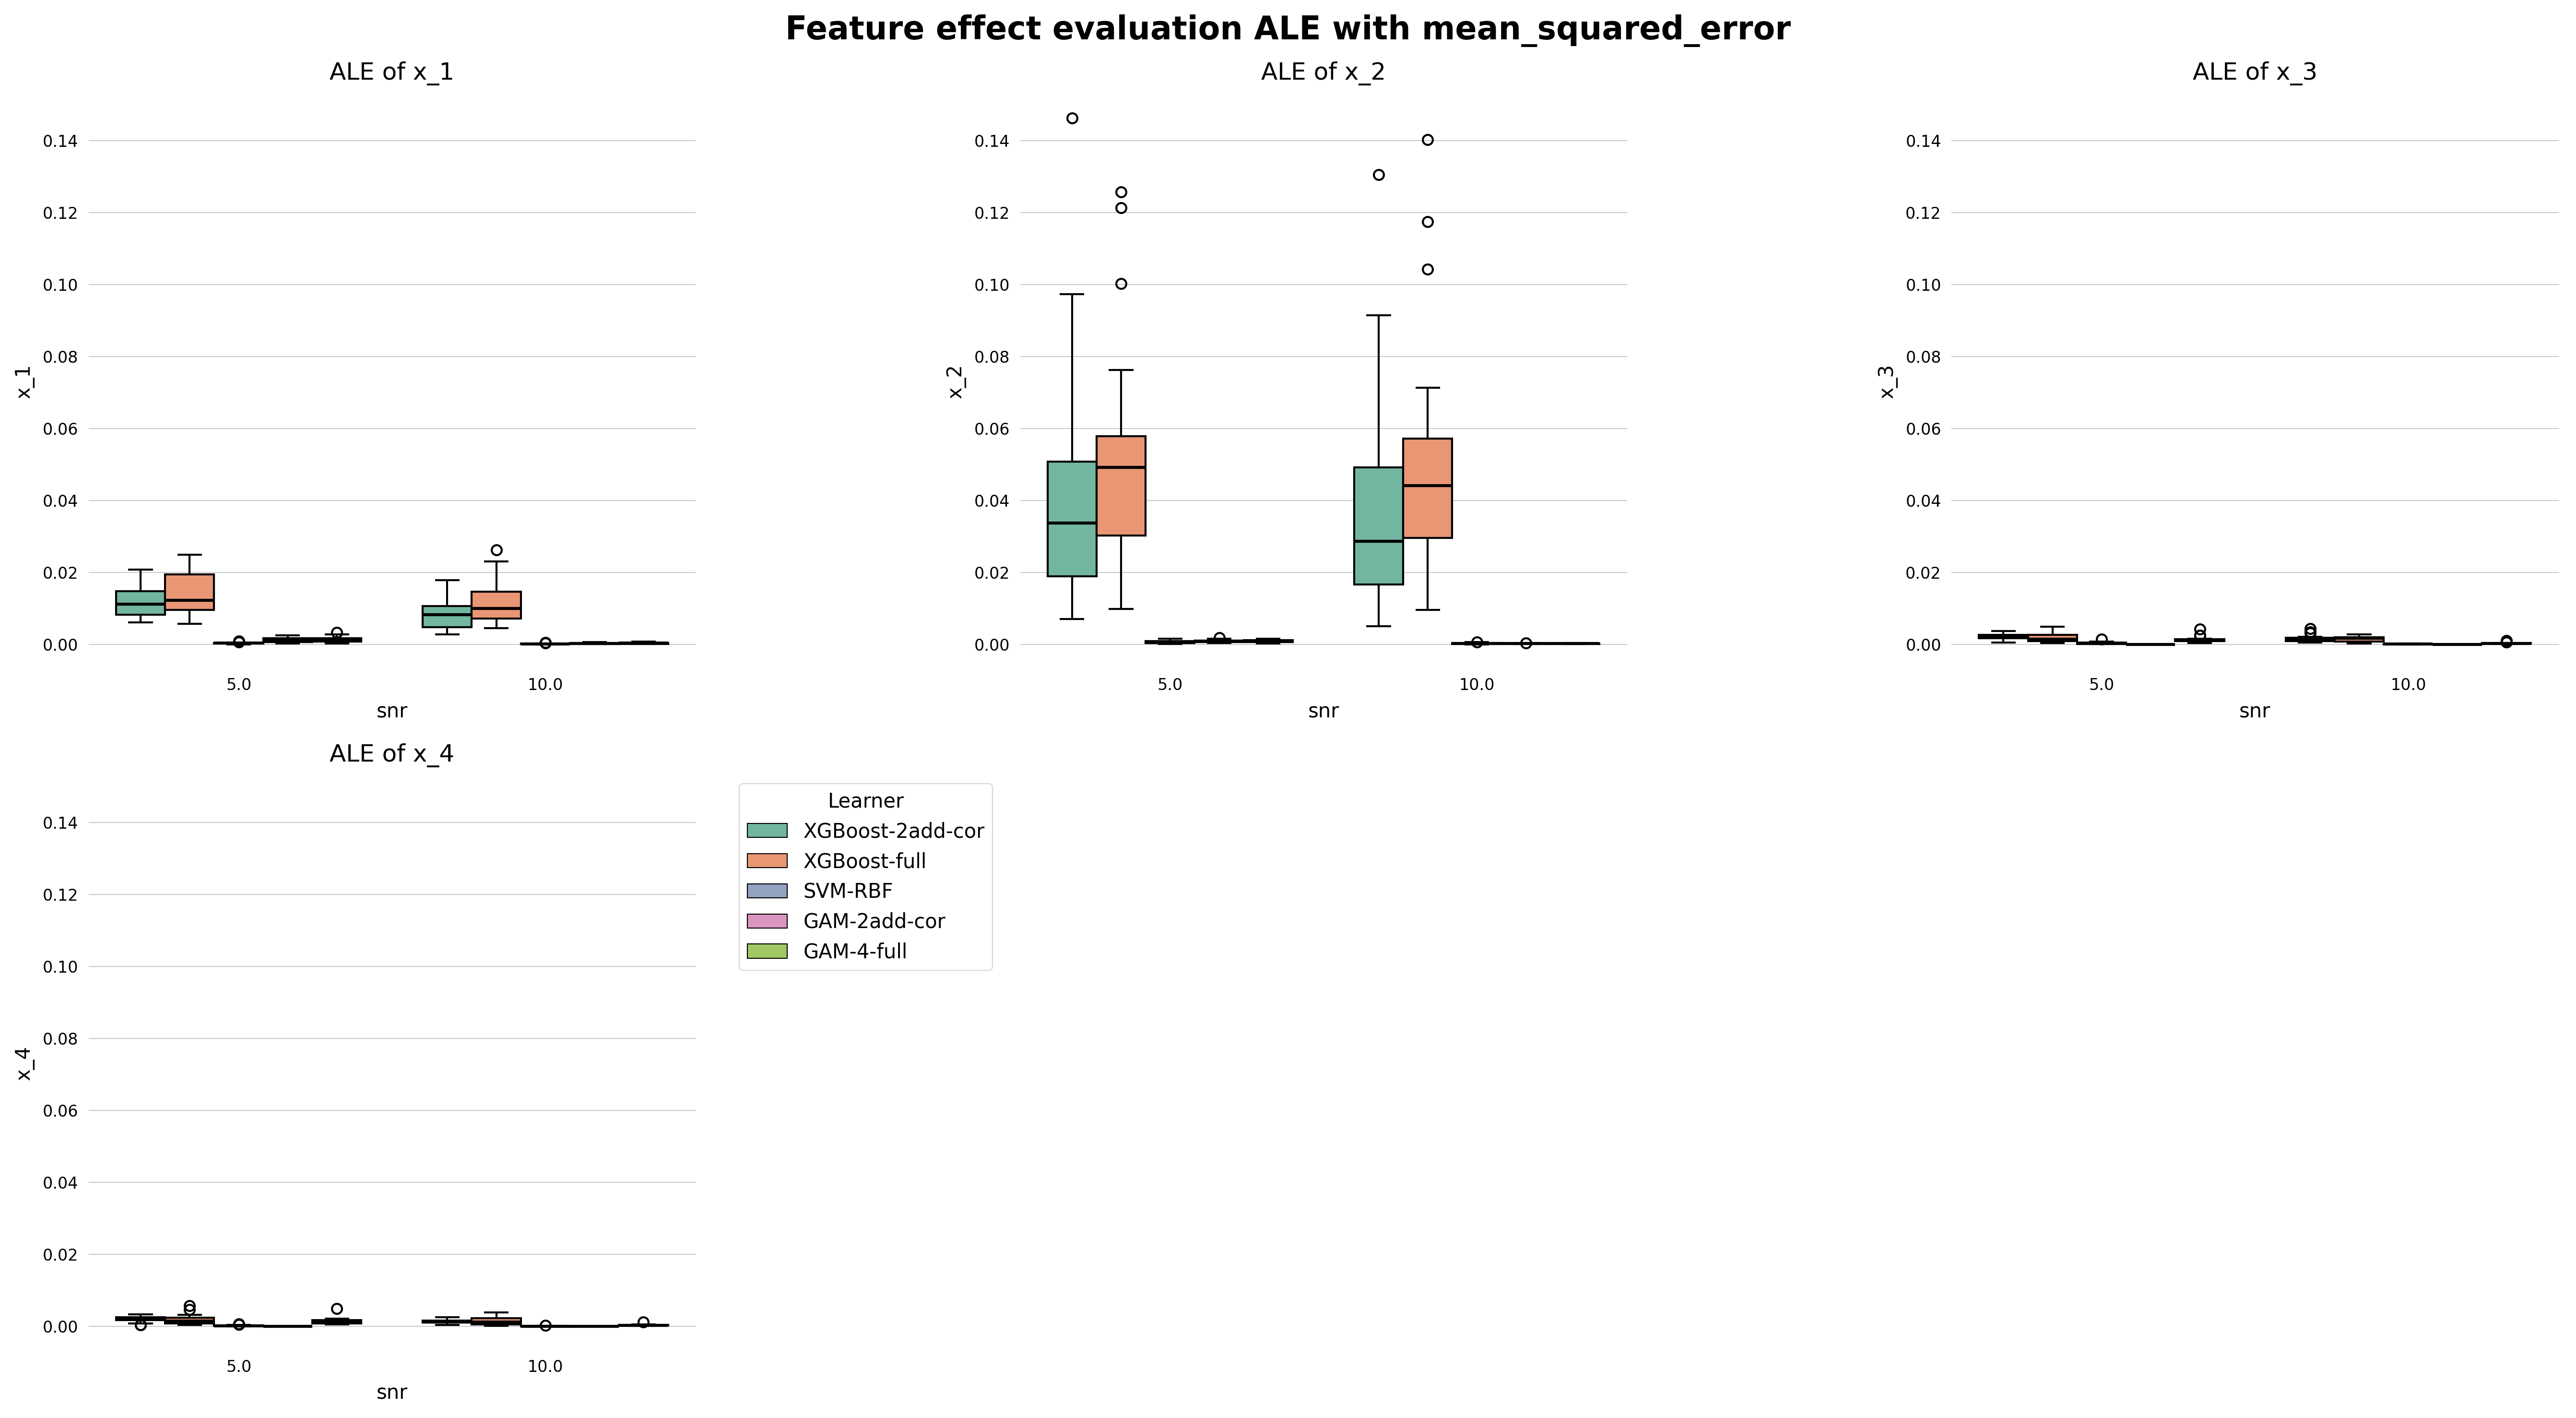

In [15]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4"], df=df, effect_type="ALE");

### ALE example visualizations

In [16]:
md(f"(simulation no. {sim_no} with n_train={n_train} and noise_sd={snr})")

(simulation no. 1 with n_train=1000 and noise_sd=10)

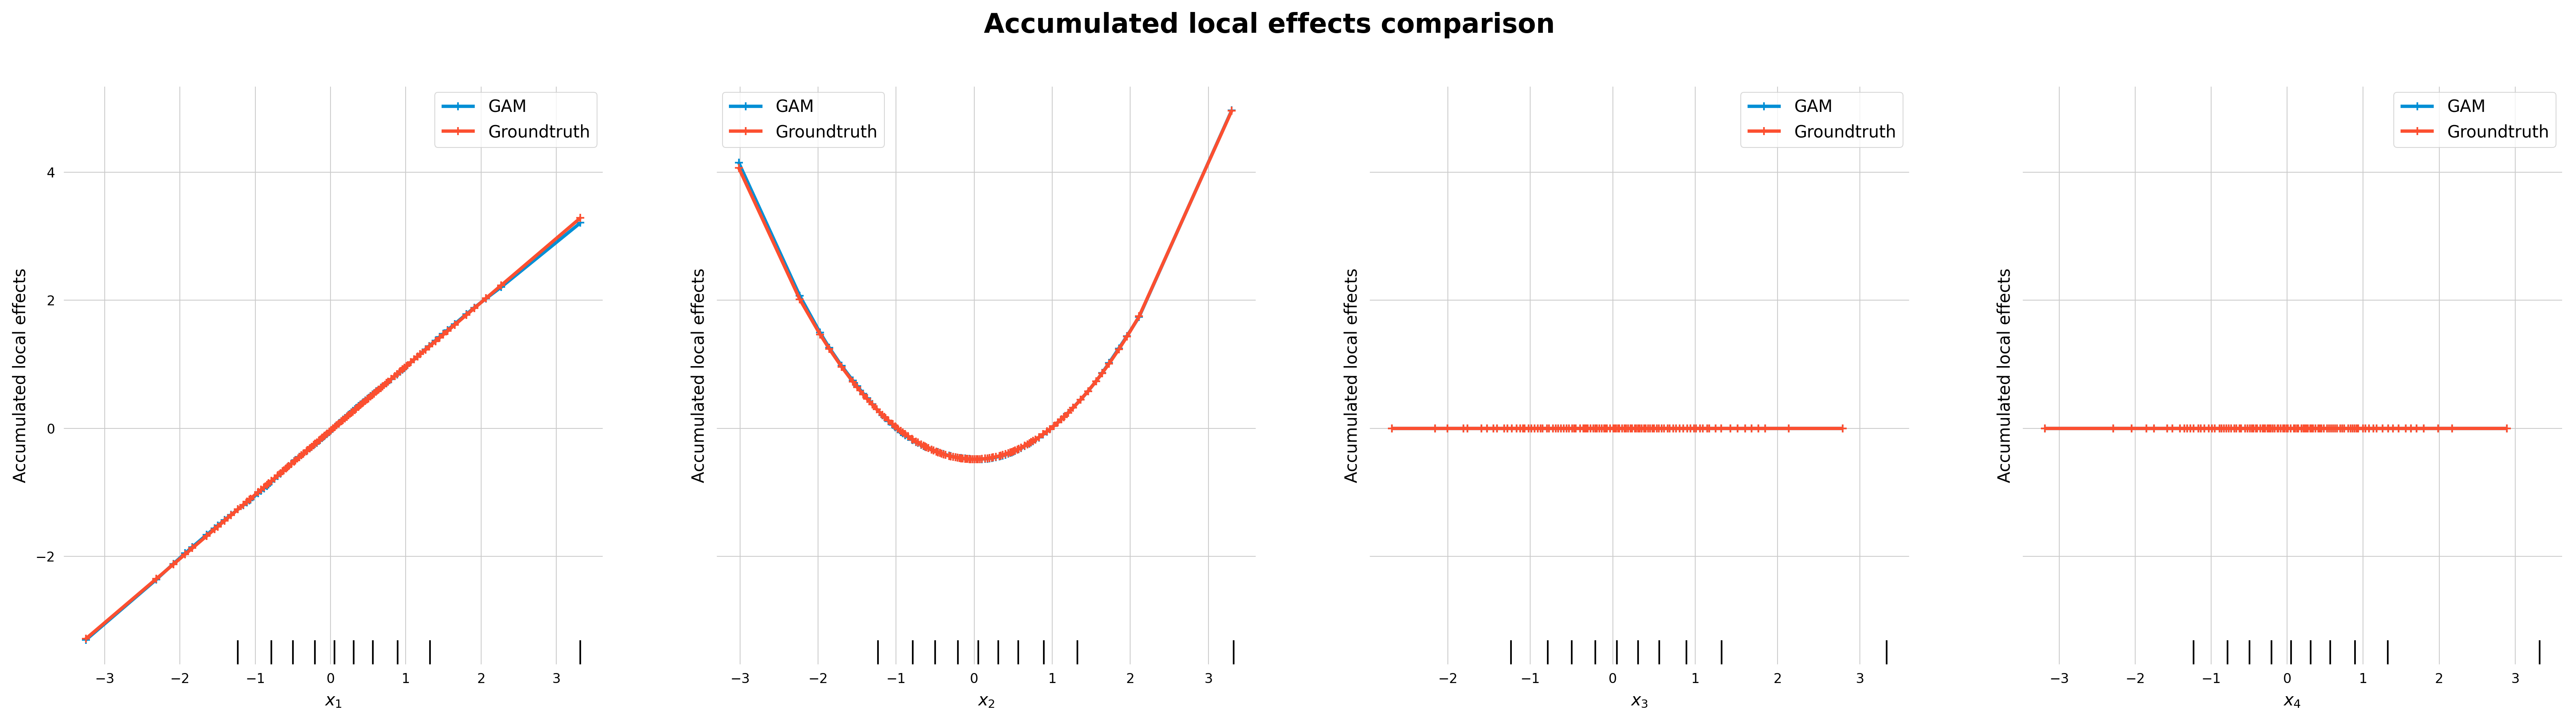

In [17]:
%matplotlib inline
plot_effect_comparison(gam, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

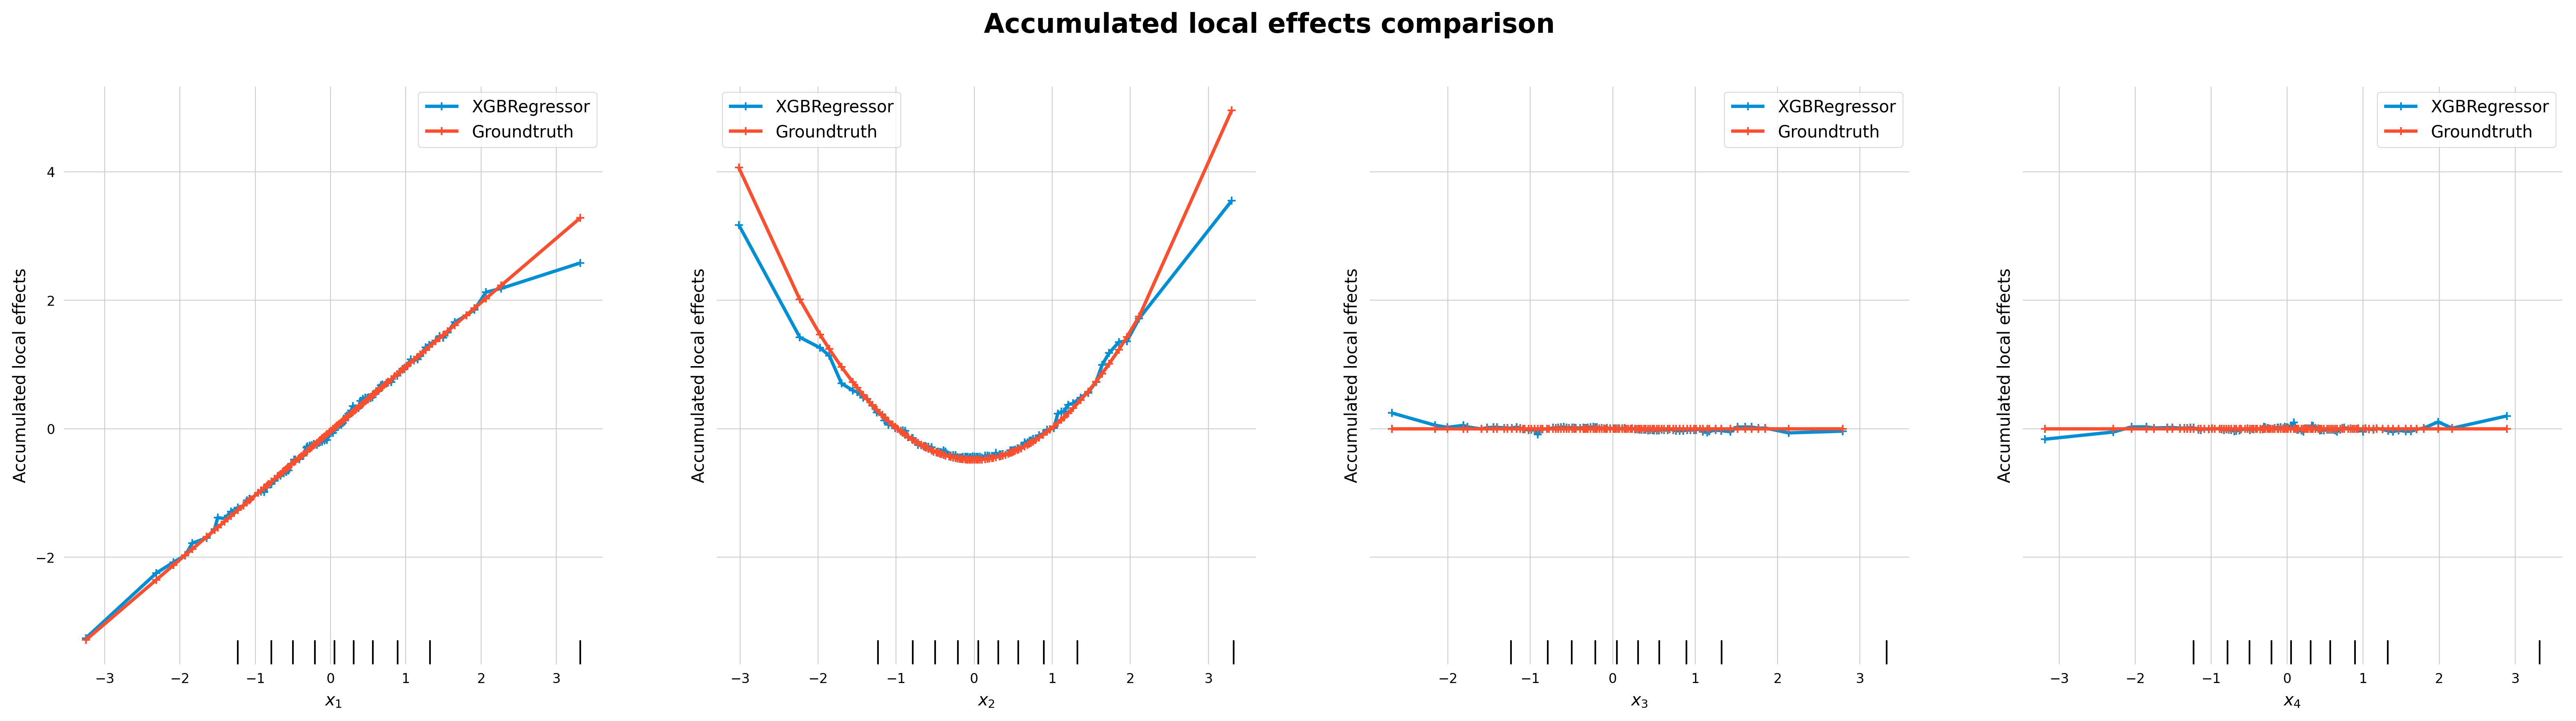

In [19]:
%matplotlib inline
plot_effect_comparison(xgb, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);

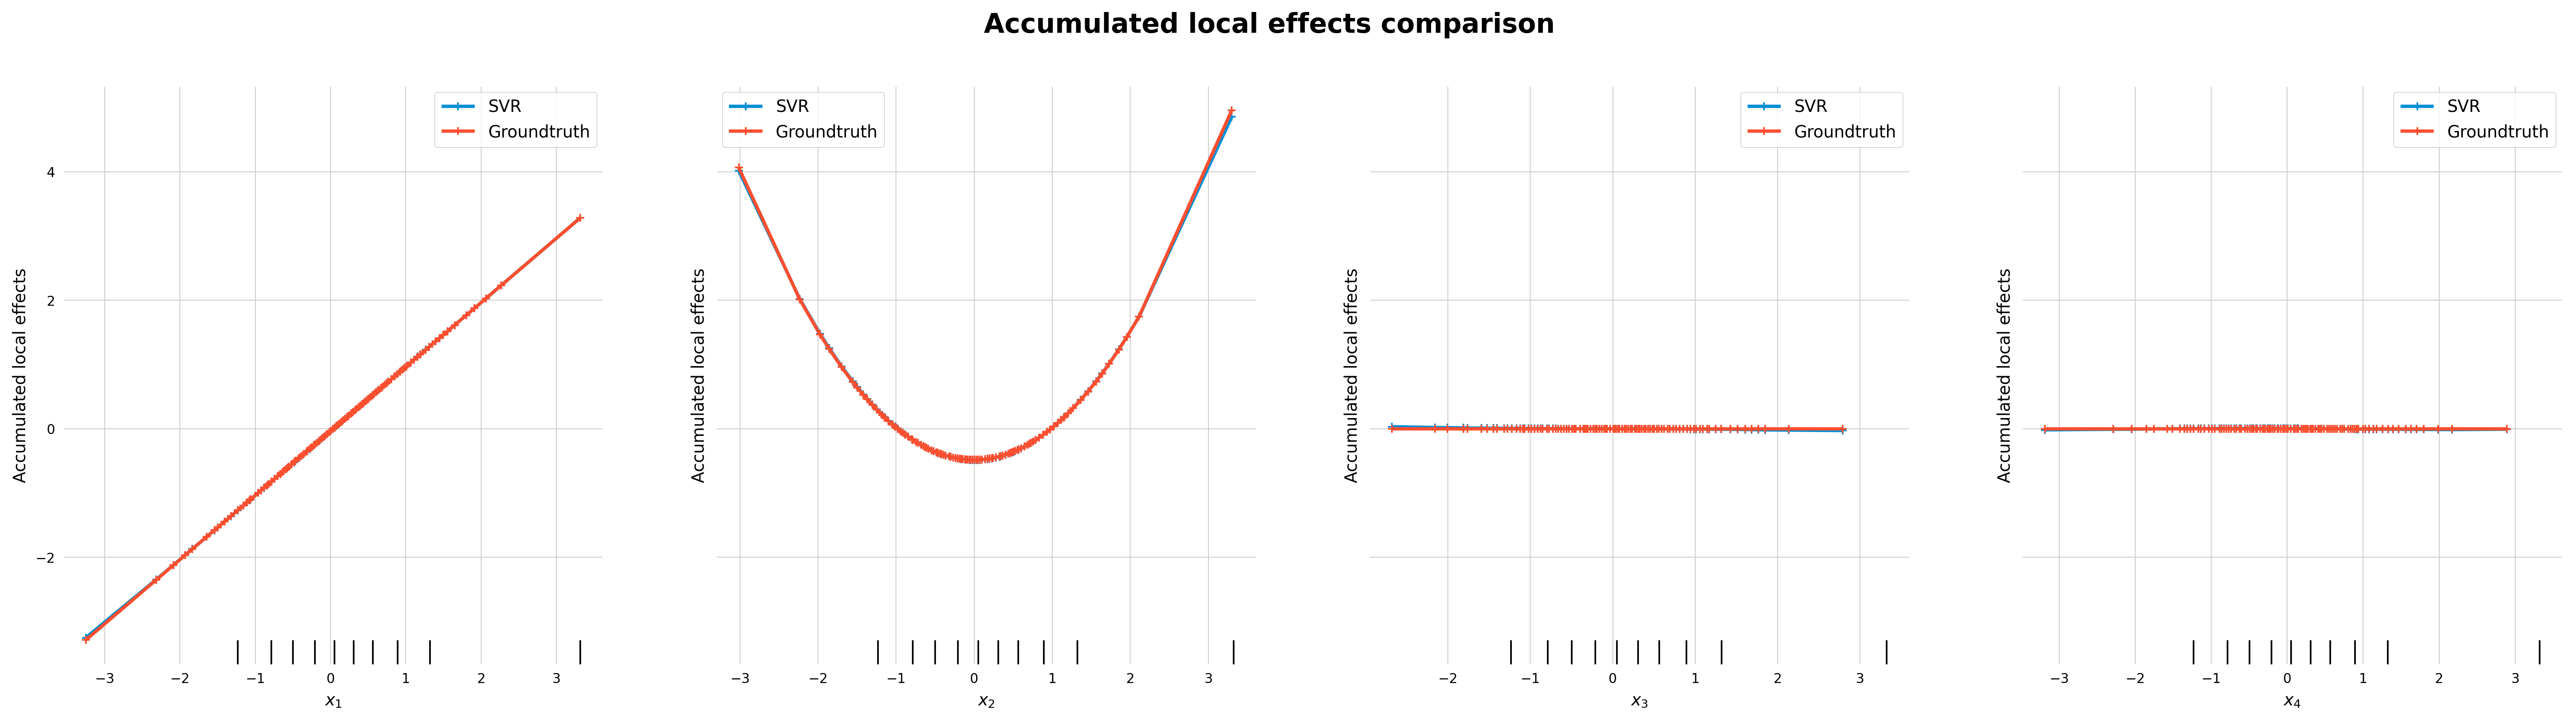

In [21]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="ALE", groundtruth_feature_effect=groundtruth_effect, features=['x_1', "x_2", "x_3", "x_4"], config=config);